# Propagación de una onda propagante en un medio no dispersivo

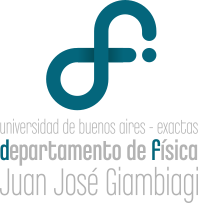  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Medio no dispersivo
La perturbación que se propaga por el medio, excepto que se trate de una única armónica, se describe con un espectro de amplitudes a distintas $\omega$.
Cada medio tiene una particular relación de dispersión.
Si tal relación puede linealizarse en función de $k$ cada componente del espectro de $\omega$ se propaga según
$$
\omega(k) = v_\varphi(k) k,
$$
con su correspondiente velocidad de fase $v_\varphi$.

Se considera no dispersivo un medio si en el rango de $\omega$ que se requiere para describir su modulación (o la mayor parte) la variación de las $v_\varphi$ __es despreciable__ y se las puede considerar iguales a la velocidad de grupo
$$
v_g = \frac{\partial \omega}{\partial k},
$$
es decir
$$
v_\varphi \cong v_g
$$

## Perturbación propagando en una cuerda

Una perturbación se propaga en una cuerda infinita con velocidad $v$.
Las figuras la muestran en $t =0$ y $t = 4\,\mathrm{s}$.

Determine $v$ y $\psi(x,t)$.    
![](figuras/perturbaciónCuerda.png)

### ¿Que le pasa a la perturbación?

Podriamos descomponer ese _diente_ en una serie de Fourier que de cuenta de su espectro de amplitudes.

Cada armónica de estas componentes se propagará a derecha, por tanto en el argumento el signo que acompaña a $k_i$ debe oponerse al que acompaña a $\omega_i$.
Si los terminos de la serie fueran funciones coseno, cada uno de terminos se expresaría como 

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
phi_i, A_i = sym.symbols('\phi_i, A_i')
x, t = sym.symbols('x, t')
v, k_i, omega_i = sym.symbols(r'v_\varphi, k_i, omega_i')
propagaPositivo1 = sym.Eq(phi_i, A_i* sym.cos(- k_i* x+ omega_i* t ))
propagaPositivo1

Eq(\phi_i, A_i*cos(k_i*x - omega_i*t))

Puesto que se considera que el **medio es no dispersivo** se asume una única relación de dispersión para todas las $\omega_i$ involucradas, y por tanto puede escribirse lo anterior en función de una única velocidad de fase $v_\varphi$

In [3]:
propagaPositivo2 = sym.Eq(phi_i, A_i* sym.cos(omega_i* (t - (k_i/ omega_i)* x) ) )
propagaPositivo2

Eq(\phi_i, A_i*cos(omega_i*(-k_i*x/omega_i + t)))

In [4]:
propagaPositivo3 = propagaPositivo2.subs(k_i/ omega_i, 1/v)
propagaPositivo3

Eq(\phi_i, A_i*cos(omega_i*(t - x/v_\varphi)))

Pero si cada una de estas $\phi_i$ se propagará con idéntica velocidad $v_\varphi$ todo lo que notaremos es un _desplazamiento rígido_ de donde debe expresarse cada uno de los armónicos.

Podemos ahorrarnos todo el trabajo de expresar la serie de Fourier y simplemente encontrar una forma matemática de la perturbación que podamos desplazar con $v_\varphi$.

Puesto que la perturbación en $t = 0$ está estríctamente localizada en $1\,\mathrm{m} < x < 3\,\mathrm{m}$  
![](figuras/perturbaciónCuerdat0.png)  
requerimos una función partida para describirle
$$
\phi_i (x, t=0) = 
\begin{cases}
0 
& x < 1\,\mathrm{m}\\
\left( \frac{1\,\mathrm{cm} }{ 3\,\mathrm{m} - 1\,\mathrm{m} } \right) x - 1\,\mathrm{m} \left( \frac{1\,\mathrm{cm} }{ 3\,\mathrm{m} - 1\,\mathrm{m} } \right) 
= 5\,10^{-3} x - 5\,10^{-3} \mathrm{m}
& 1\,\mathrm{m} \leq x < 3\,\mathrm{m}\\
0 
& 3\,\mathrm{m} \leq x\\
\end{cases}.
$$

La perturbación en $t=0$ en $\Delta t= 4\,\mathrm{s}$ presenta un _desplazamiento rígido_   
![](figuras/perturbaciónCuerdat4s.png)  
La velocidad de fase puede obtenerse de determinar el desplazamiento, $\Delta x$, de alguna característica de la perturbación.
Por ejemplo el punto en el que inicia la pendiente presenta un $\Delta x = 3\,\mathrm{m} - 1\,\mathrm{m}$ en ese $\Delta t$.
Puesto que la velocidadad de propagación es constante
$$
v = \frac{\Delta x}{\Delta t} = \frac{2\,\mathrm{m}}{4\,\mathrm{s}} = 0.5\,\mathrm{\frac{m}{s}}.
$$

Como en el caso de las funciones trigonométricas, la propagación de una función se produce en el sentido positivo de $\hat{x}$ si su argumento responde a 
$$
x - v t,
$$
así
$$
\phi_i (x,t) = 
\begin{cases}
0 
& x < 1\,\mathrm{m} + 0.5\,\mathrm{\frac{m}{s}} t\\
5\,10^{-3} \left( x - 0.5\,\mathrm{\frac{m}{s}} t \right) - 5\,10^{-3} \mathrm{m}
= 5\,10^{-3} x - 2.5\,10^{-3}\,\mathrm{\frac{m}{s}} t - 5\,10^{-3} \mathrm{m}
& 1\,\mathrm{m} + 0.5\,\mathrm{\frac{m}{s}} t \leq x < 3\,\mathrm{m} + 0.5\,\mathrm{\frac{m}{s}} t\\
0 
& 3\,\mathrm{m} + 0.5\,\mathrm{\frac{m}{s}} t \leq t\\
\end{cases}
$$

La [función escalón de Heaviside](https://es.wikipedia.org/wiki/Funci%C3%B3n_escal%C3%B3n_de_Heaviside) 
$$
\theta(x- x_0) = 
\begin{cases}
0 & x< x_0\\
1 & x_0 \leq x\\
\end{cases}
$$

permite resumir eso


In [5]:
velocidad_fase = 0.5
perturbacíon_x_inicio = 1 + velocidad_fase* t
perturbacíon_x_fin = 3 + velocidad_fase* t
psi_expresion= (5E-3 * x - 2.5E-3 * t - 5E-3)* (
    + sym.Heaviside( x - perturbacíon_x_inicio )
    - sym.Heaviside( x - perturbacíon_x_fin ) 
    )
sym.Eq(propagaPositivo3.lhs, psi_expresion, evaluate=False)

Eq(\phi_i, (-Heaviside(-0.5*t + x - 3) + Heaviside(-0.5*t + x - 1))*(-0.0025*t + 0.005*x - 0.005))

donde todo se expresa en las unidades base del SI.

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
psi_expresion_t0 = psi_expresion.subs(t,0)
psi_expresion_t0

(0.005*x - 0.005)*(-Heaviside(x - 3) + Heaviside(x - 1))

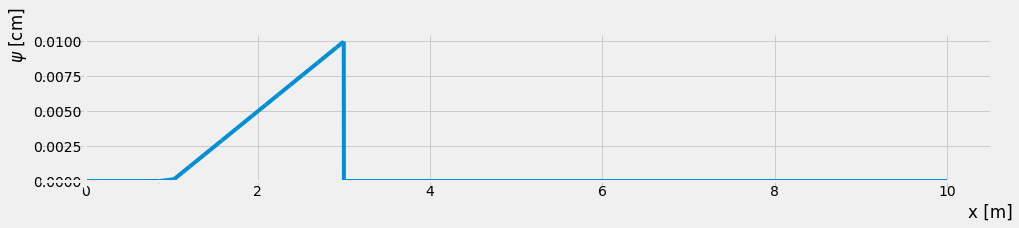

In [8]:
sym.plot(psi_expresion_t0, (x, 0, 10), ylabel=r'$\psi$ [cm]', xlabel='x [m]', size = (14.0,3.0) )

In [9]:
psi_expresion_t4 = psi_expresion.subs(t, 4)
psi_expresion_t4

(0.005*x - 0.015)*(-Heaviside(x - 5.0) + Heaviside(x - 3.0))

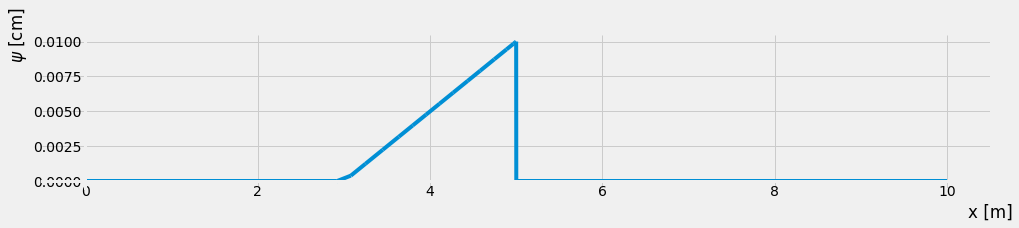

In [10]:
sym.plot(psi_expresion_t4, (x, 0, 10), ylabel=r'$\psi$ [cm]', xlabel='x [m]', size = (14.0,3.0))

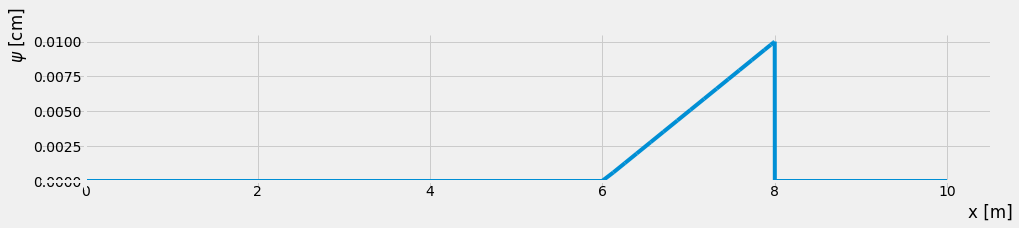

In [11]:
psi_expresion_t10 = psi_expresion.subs(t, 10)
sym.plot(psi_expresion_t10, (x, 0, 10), ylabel=r'$\psi$ [cm]', xlabel='x [m]', size = (14.0,3.0))